# DSR - Practical 2 - Backprop on a single artificial Neuron



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random

In [16]:
class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        random.seed(42)
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 /(1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
    
    def predict(self, x):
              # calulate the predictions
         ### ENTER YOUR CODE HERE
        preds = np.dot(x, self.W)
        preds = self.sigmoid_activation(preds)
        # return the predictions
        return preds
            
    def fit(self, X, y, epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        losses=[]
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            error = preds - y
            loss = (1/len(preds))*np.sum(error ** 2)
            losses.append(loss)
            # the gradient descent update is the dot product between our
            # (1) features and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T, d)#X.T.dot(d)
            print(gradient)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        return losses

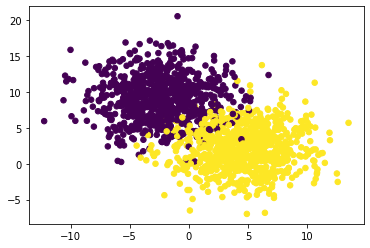

In [27]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1600, n_features=2, centers=2,
cluster_std=3, random_state=42)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=30)

# insert a column of 1's as the last entry in the feature
# matrix -- so we can train the bias as part of the weights
X = np.c_[X, np.ones((X.shape[0]))]
          
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [10]:
len(testY)

800

In [11]:
### Modify Perceptron Class such that you save the training losses and return them 

In [28]:
epochs = 100
alpha = 0.001
# create Perceptron object and train
p = Perceptron(3, alpha=alpha)
losses = p.fit(trainX, trainY, epochs=epochs)

training...
[[-331.27126171]
 [ 326.4024938 ]
 [  -0.81073178]]
epoch=  1 , loss=  0.4623703503369485
[[-141.70300685]
 [ -72.58687812]
 [ -22.62829861]]
epoch=  2 , loss=  0.09782971811872841
[[-52.97255558]
 [  4.80573995]
 [ -5.48910425]]
epoch=  3 , loss=  0.056291330376408134
[[-34.69084964]
 [ 10.35751345]
 [ -3.80855471]]
epoch=  4 , loss=  0.05039283883444547
[[-26.567346  ]
 [  8.35848918]
 [ -3.6687318 ]]
epoch=  5 , loss=  0.04747315933797408
[[-21.50901972]
 [  7.02238725]
 [ -3.59316701]]
epoch=  6 , loss=  0.04568801151530168
[[-18.03017786]
 [  6.05542282]
 [ -3.5446777 ]]
epoch=  7 , loss=  0.04448056668688017
[[-15.4793707 ]
 [  5.32109106]
 [ -3.50933084]]
epoch=  8 , loss=  0.04360925140929016
[[-13.5233458 ]
 [  4.74363344]
 [ -3.4812066 ]]
epoch=  9 , loss=  0.04295118838095208
[[-11.97285737]
 [  4.27722573]
 [ -3.45746366]]
epoch=  10 , loss=  0.042436952604017954
[[-10.71201829]
 [  3.89242572]
 [ -3.43660006]]
epoch=  11 , loss=  0.04202425554077257
[[-9.665685

In [29]:
# evaluate our model
print("evaluating...")
preds = p.predict(testX)
# apply a step function to threshold the outputs to binary
# class labe|ls
preds[preds <= 0.5] = 0
preds[preds > 0.5] = 1
print(classification_report(testY, preds))

evaluating...
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       403
           1       0.96      0.92      0.94       397

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



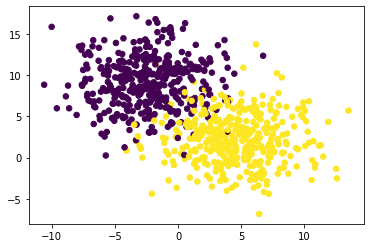

In [30]:
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

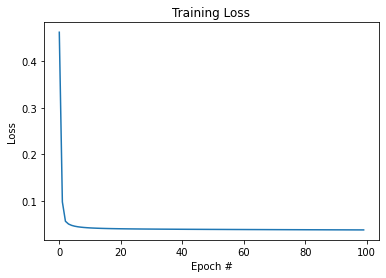

In [31]:
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Gradient Descent can be very slow and wasteful.
#### Especially if you are dealing with big data sets the computation becomes very coastly, yielding huge matrix calculations 
$$ W \cdot{X}   $$
#### the following is a more efficient way to perform GD with faster convergence.

## Stochastic Gradient descent
### instead of updating the weights on an entire epoch we do more updates on mini-batches of data.
### This way we have multiple updates per epoch.

#### implement sgd in our perceptron class (batches of 16)

In [79]:
## enter modified Perceptron Class here
class Perceptron:
    def __init__(self, N,alpha=0.1):
        # initialize the weight matrix and store the learning rate
        random.seed(42)
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 /(1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
    
    def predict(self,x):
              # take the dot product between our features and weight matrix
         ### ENTER YOUR CODE HERE
        preds = np.dot(x,self.W)
        preds = self.sigmoid_activation(preds) 
        
        # return the predictions
        return preds
            
    def fit(self, X, y,epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        
        losses = []
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            x_batched = np.split(X,len(X)/16)
            y_batched = np.split(y,len(y)/16)
            for ind, xb in enumerate(x_batched): 
                preds = self.predict(xb)
                # now that we have our predictions, we need to determine the
                # `error`, which is the difference between our predictions and
                # the true values
                error = preds - y_batched[ind]
                loss = (1/ 16) * np.sum(error ** 2)
                losses.append(loss)
                # the gradient descent update is the dot product between our
                # (1) features and (2) the error of the sigmoid derivative of
                # our predictions
                d = error * self.sigmoid_deriv(preds)
                gradient = np.dot(xb.T,d)#X.T.dot(d)
                # in the update stage, all we need to do is "nudge" the weight
                # matrix in the negative direction of the gradient (hence the
                # term "gradient descent" by taking a small step towards a set
                # of "more optimal" parameters
                self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
            # shuffling the data the before next epoch
            # so the perceptron sees different batches
            idx = np.random.permutation(len(X))  
            X = X[idx]
            y = y[idx]
        return losses

In [80]:
# create a perceptron object and train it save the losses as losses2 and compare the 
# losses of the current and former percptrons
epochs = 100
alpha = 0.01
p = Perceptron(3, alpha=alpha)
losses2 = p.fit(trainX, trainY, epochs=epochs)

training...
epoch=  1 , loss=  0.31583767416302766
epoch=  2 , loss=  0.6161448110153249
epoch=  3 , loss=  0.007511451907084311
epoch=  4 , loss=  0.012512764167853171
epoch=  5 , loss=  0.001053223217043605
epoch=  6 , loss=  0.0019928838229284758
epoch=  7 , loss=  0.0008347686944748919
epoch=  8 , loss=  0.003681514423990994
epoch=  9 , loss=  0.0023575858852885132
epoch=  10 , loss=  0.0013671855673695553
epoch=  11 , loss=  0.0023517621050728544
epoch=  12 , loss=  0.0021579236700958685
epoch=  13 , loss=  0.0010733763880454163
epoch=  14 , loss=  0.0009449533446694751
epoch=  15 , loss=  0.0004585654955955252
epoch=  16 , loss=  0.0016378991233257827
epoch=  17 , loss=  0.007280033276240244
epoch=  18 , loss=  0.008449394240122348
epoch=  19 , loss=  0.0005184001900421843
epoch=  20 , loss=  0.0002857796901936508
epoch=  21 , loss=  0.007014045496028671
epoch=  22 , loss=  0.00034125769981537777
epoch=  23 , loss=  0.0009145906817417133
epoch=  24 , loss=  7.55206512984395e-05
e

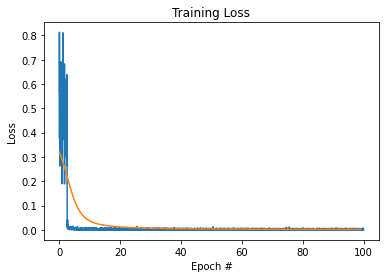

In [81]:
#plot the losses of both perceptrons
plt.plot(np.arange(0, len(losses2))/50, losses2)
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
# plt.xlim((40,110))
# plt.ylim((-0.02,0.2))
plt.show()

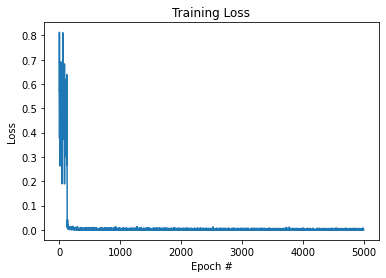

In [82]:

plt.plot(np.arange(0, len(losses2)), losses2)

plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

In [17]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [20]:
p = Perceptron(2, alpha=0.1)
losses = p.fit(X, y, epochs=100)

training...
[[-0.0167152 ]
 [ 0.05480159]]
epoch=  1 , loss=  0.31150183202125614
[[-0.01638625]
 [ 0.05486634]]
epoch=  2 , loss=  0.31133774998160463
[[-0.01605743]
 [ 0.05493231]]
epoch=  3 , loss=  0.311173852798556
[[-0.01572872]
 [ 0.05499951]]
epoch=  4 , loss=  0.311010122309672
[[-0.01540011]
 [ 0.05506793]]
epoch=  5 , loss=  0.3108465403515591
[[-0.01507159]
 [ 0.05513758]]
epoch=  6 , loss=  0.3106830887571291
[[-0.01474312]
 [ 0.05520847]]
epoch=  7 , loss=  0.31051974935285237
[[-0.01441471]
 [ 0.05528059]]
epoch=  8 , loss=  0.3103565039560092
[[-0.01408633]
 [ 0.05535395]]
epoch=  9 , loss=  0.31019333437193874
[[-0.01375795]
 [ 0.05542855]]
epoch=  10 , loss=  0.3100302223912882
[[-0.01342958]
 [ 0.05550439]]
epoch=  11 , loss=  0.3098671497872636
[[-0.01310118]
 [ 0.05558149]]
epoch=  12 , loss=  0.30970409831288437
[[-0.01277275]
 [ 0.05565983]]
epoch=  13 , loss=  0.30954104969824286
[[-0.01244426]
 [ 0.05573943]]
epoch=  14 , loss=  0.3093779856477724
[[-0.0121157 

In [21]:
pred = p.predict(X)

In [22]:
pred


array([[0.5       ],
       [0.78082436],
       [0.62792104],
       [0.85739072]])

In [23]:
y


array([[0],
       [1],
       [1],
       [0]])